<a href="https://colab.research.google.com/github/apal9569/Human-Activity-Recognition/blob/master/HAR_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [45]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
!wget http://www.shl-dataset.org/wp-content/uploads/SHLChallenge2019/challenge-2019-train_hips.zip

--2019-06-17 05:24:48--  http://www.shl-dataset.org/wp-content/uploads/SHLChallenge2019/challenge-2019-train_hips.zip
Resolving www.shl-dataset.org (www.shl-dataset.org)... 37.187.125.22
Connecting to www.shl-dataset.org (www.shl-dataset.org)|37.187.125.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5871677913 (5.5G) [application/zip]
Saving to: ‘challenge-2019-train_hips.zip’

challenge-2019-trai 100%[===================>]   5.47G  11.2MB/s    in 8m 23s  

2019-06-17 05:33:13 (11.1 MB/s) - ‘challenge-2019-train_hips.zip’ saved [5871677913/5871677913]



In [0]:
!wget http://www.shl-dataset.org/wp-content/uploads/SHLChallenge2019/challenge-2019-validate_all.zip

--2019-06-17 05:39:39--  http://www.shl-dataset.org/wp-content/uploads/SHLChallenge2019/challenge-2019-validate_all.zip
Resolving www.shl-dataset.org (www.shl-dataset.org)... 37.187.125.22
Connecting to www.shl-dataset.org (www.shl-dataset.org)|37.187.125.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1487714593 (1.4G) [application/zip]
Saving to: ‘challenge-2019-validate_all.zip’

challenge-2019-vali 100%[===================>]   1.38G  11.2MB/s    in 2m 10s  

2019-06-17 05:41:50 (10.9 MB/s) - ‘challenge-2019-validate_all.zip’ saved [1487714593/1487714593]



In [0]:
!unzip challenge-2019-train_hips.zip

In [0]:
!unzip challenge-2019-validate_all.zip

In [0]:
import pandas as pd
import numpy as np
def read_data(data):
  data=np.array(data)
  return pd.DataFrame(data[:,1:])

In [0]:
def defining(data):
  n,m=data.shape
  data=np.array(data)
  data=pd.DataFrame(data[:n-1,:])
  return data

In [58]:
accX=pd.read_csv('intern/accX.csv')
accX=read_data(accX)
accX=defining(accX)
accX_val=pd.read_csv('intern/accX_val.csv')
accX_val=read_data(accX_val)
accX_val=defining(accX_val)

accY=pd.read_csv('intern/accY.csv')
accY=read_data(accY)
accY=defining(accY)
accY_val=pd.read_csv('intern/accY_val.csv')
accY_val=read_data(accY_val)
accY_val=defining(accY_val)

accZ=pd.read_csv('intern/accZ.csv')
accZ=read_data(accZ)
accZ=defining(accZ)
accZ_val=pd.read_csv('intern/accZ_val.csv')
accZ_val=read_data(accZ_val)
accZ_val=defining(accZ_val)


(12177, 50)
(12176, 50)


In [0]:
accX1=pd.read_csv('acc_x.csv')
accX1=read_data(accX1)
accX1_val=pd.read_csv('acc_xval.csv')
accX1_val=read_data(accX1_val)

accY1=pd.read_csv('acc_y.csv')
accY1=read_data(accY1)
accY1_val=pd.read_csv('acc_yval.csv')
accY1_val=read_data(accY1_val)

accZ1=pd.read_csv('acc_z.csv')
accZ1=read_data(accZ1)
accZ1_val=pd.read_csv('acc_zval.csv')
accZ1_val=read_data(accZ1_val)

In [0]:
accX=np.concatenate([accX,accX1],axis=1)
accX_val=np.concatenate([accX_val,accX1_val],axis=1)
accY=np.concatenate([accY,accY1],axis=1)
accY_val=np.concatenate([accY_val,accY1_val],axis=1)
accZ=np.concatenate([accZ,accZ1],axis=1)
accZ_val=np.concatenate([accZ_val,accZ1_val],axis=1)
accX.shape,accX_val.shape,accY1.shape,accY1_val.shape,accZ1.shape,accZ1_val.shape

((196072, 20),
 (12177, 20),
 (196072, 20),
 (12177, 20),
 (196072, 20),
 (12177, 20))

In [0]:
mag_acc=np.add(np.square(accX),np.square(accY))#,np.square(acc_z))
mag_acc=np.sqrt(np.add(mag_acc,np.square(accX)))

mag_accval=np.add(np.square(accX_val),np.square(accY_val))#,np.square(acc_z))
mag_accval=np.sqrt(np.add(mag_accval,np.square(accX_val)))


In [60]:
accX.shape,accX_val.shape,accY.shape,accY_val.shape,accZ.shape,accZ_val.shape

((196071, 50),
 (12176, 50),
 (196071, 50),
 (12176, 50),
 (196071, 50),
 (12176, 50))

In [0]:
gyrX=pd.read_csv('intern/gyrX.csv')
gyrX=read_data(gyrX)
gyrX=defining(gyrX)
gyrX_val=pd.read_csv('intern/gyrX_val.csv')
gyrX_val=read_data(gyrX_val)
gyrX_val=defining(gyrX_val)

gyrY=pd.read_csv('intern/gyrY.csv')
gyrY=read_data(gyrY)
gyrY=defining(gyrY)
gyrY_val=pd.read_csv('intern/gyrY_val.csv')
gyrY_val=read_data(gyrY_val)
gyrY_val=defining(gyrY_val)

gyrZ=pd.read_csv('intern/gyrZ.csv')
gyrZ=read_data(gyrZ)
gyrZ=defining(gyrZ)
gyrZ_val=pd.read_csv('intern/gyrZ_val.csv')
gyrZ_val=read_data(gyrZ_val)
gyrZ_val=defining(gyrZ_val)


In [67]:
gyrX.shape,gyrX_val.shape,gyrY.shape,gyrY_val.shape,gyrZ.shape,gyrZ_val.shape

((196071, 50),
 (12176, 50),
 (196071, 50),
 (12176, 50),
 (196071, 50),
 (12176, 50))

In [0]:
mag_gyr=np.add(np.square(gyrX),np.square(gyrY))#,np.square(acc_z))
mag_gyr=np.sqrt(np.add(mag_gyr,np.square(gyrZ)))

mag_gyrval=np.add(np.square(gyrX_val),np.square(gyrY_val))#,np.square(acc_z))
mag_gyrval=np.sqrt(np.add(mag_gyrval,np.square(gyrZ_val)))

In [0]:
laccX=pd.read_csv('intern/laccX.csv')
laccX=read_data(laccX)
laccX=defining(laccX)

laccX_val=pd.read_csv('intern/laccX_val.csv')
laccX_val=read_data(laccX_val)
#laccX_val=defining(laccX_val)

laccY=pd.read_csv('intern/laccY.csv')
laccY=read_data(laccY)
laccY_val=pd.read_csv('intern/laccY_val.csv')
laccY_val=read_data(laccY_val)

laccZ=pd.read_csv('intern/laccZ.csv')
laccZ=read_data(laccZ)
laccZ_val=pd.read_csv('intern/laccZ_val.csv')
laccZ_val=read_data(laccZ_val)

In [0]:
mag_lacc=np.add(np.square(laccX),np.square(laccY))
mag_lacc=np.sqrt(np.add(mag_lacc,np.square(laccX)))

mag_laccval=np.add(np.square(laccX_val),np.square(laccY_val))
mag_laccval=np.sqrt(np.add(mag_laccval,np.square(laccX_val)))


In [74]:
laccX_val.shape,laccX.shape,laccY.shape,laccZ.shape

((12176, 75), (196071, 75), (196071, 75), (196071, 75))

In [0]:
magX=pd.read_csv('intern/magX.csv')
magX=read_data(magX)
magX=defining(magX)
magX_val=pd.read_csv('intern/magX_val.csv')
magX_val=read_data(magX_val)
magX_val=defining(magX_val)

magY=pd.read_csv('intern/magY.csv')
magY=read_data(magY)
magY=defining(magY)
magY_val=pd.read_csv('intern/magY_val.csv')
magY_val=read_data(magY_val)
magY_val=defining(magY_val)

magZ=pd.read_csv('intern/magZ.csv')
magZ=read_data(magZ)
magZ=defining(magZ)
magZ_val=pd.read_csv('intern/magZ_val.csv')
magZ_val=read_data(magZ_val)
magZ_val=defining(magZ_val)


In [0]:
mag_mag=np.add(np.square(magX),np.square(magY))#,np.square(acc_z))
mag_mag=np.sqrt(np.add(mag_mag,np.square(magZ)))

mag_magval=np.add(np.square(magX_val),np.square(magY_val))#,np.square(acc_z))
mag_magval=np.sqrt(np.add(mag_magval,np.square(magZ_val)))

In [78]:
magX.shape,magX_val.shape,magY.shape,magY_val.shape,magZ.shape,magZ_val.shape

((196071, 1), (12176, 1), (196071, 1), (12176, 1), (196071, 1), (12176, 1))

In [0]:
pitch=pd.read_csv('intern/pitch_imp.csv')
pitch=read_data(pitch)
pitch=defining(pitch)
pitch_val=pd.read_csv('intern/pitch_val_imp.csv')
pitch_val=read_data(pitch_val)
pitch_val=defining(pitch_val)

yaw=pd.read_csv('intern/yaw.csv')
yaw=read_data(yaw)
yaw=defining(yaw)
yaw_val=pd.read_csv('intern/yaw_val.csv')
yaw_val=read_data(yaw_val)
yaw_val=defining(yaw_val)

roll=pd.read_csv('intern/roll.csv')
roll=read_data(roll)
roll=defining(roll)
roll_val=pd.read_csv('intern/roll_val.csv')
roll_val=read_data(roll_val)
roll_val=defining(roll_val)


In [84]:
pitch.shape,yaw.shape,roll.shape

((196071, 50), (196071, 4), (196071, 1))

In [0]:
graX=pd.read_csv('intern/gra_x.csv')
graX=read_data(graX)
graX_val=pd.read_csv('intern/gra_xval.csv')
graX_val=read_data(graX_val)

graY=pd.read_csv('intern/gra_y.csv')
graY=read_data(graY)
graY_val=pd.read_csv('intern/gra_yval.csv')
graY_val=read_data(graY_val)

graZ=pd.read_csv('intern/gra_z.csv')
graZ=read_data(graZ)
graZ_val=pd.read_csv('intern/gra_zval.csv')
graZ_val=read_data(graZ_val)

In [0]:
mag_gra=np.add(np.square(graX),np.square(graZ))#,np.square(acc_z))
mag_gra=np.sqrt(np.add(mag_gra,np.square(graZ)))

mag_graval=np.add(np.square(graX_val),np.square(graY_val))#,np.square(acc_z))
mag_graval=np.sqrt(np.add(mag_graval,np.square(graZ_val)))

In [88]:
graX.shape,graX_val.shape,graY_val.shape,graZ_val.shape

((196071, 1), (12176, 1), (12176, 1), (12176, 1))

In [0]:
oriX=pd.read_csv('intern2/ori_x.csv')
oriX=read_data(oriX)
oriX=defining(oriX)
oriX_val=pd.read_csv('intern2/ori_xval.csv')
oriX_val=read_data(oriX_val)
oriX_val=defining(oriX_val)

oriY=pd.read_csv('intern2/ori_y.csv')
oriY=read_data(oriY)
oriY=defining(oriY)
oriY_val=pd.read_csv('intern2/ori_yval.csv')
oriY_val=read_data(oriY_val)
oriY_val=defining(oriY_val)

oriZ=pd.read_csv('intern2/ori_z.csv')
oriZ=read_data(oriZ)
oriZ=defining(oriZ)
oriZ_val=pd.read_csv('intern2/ori_zval.csv')
oriZ_val=read_data(oriZ_val)
oriZ_val=defining(oriZ_val)

oriW=pd.read_csv('intern2/ori_w.csv')
oriW=read_data(oriW)
oriW=defining(oriW)
oriW_val=pd.read_csv('intern2/ori_wval.csv')
oriW_val=read_data(oriW_val)
oriW_val=defining(oriW_val)


In [90]:
oriX.shape,oriX_val.shape,oriY.shape,oriY_val.shape,oriZ.shape,oriZ_val.shape,oriW.shape,oriW_val.shape

((196071, 1),
 (12176, 1),
 (196071, 2),
 (12176, 2),
 (196071, 3),
 (12176, 3),
 (196071, 1),
 (12176, 1))

In [0]:

press=pd.read_csv('intern/press.csv')
press=read_data(press)
press_val=pd.read_csv('intern/press_val.csv')
press_val=read_data(press_val)


In [92]:
press.shape,press_val.shape

((196071, 1), (12176, 1))

In [106]:
cd ..

/content


In [0]:
label=pd.read_csv('train/Hips/Label.txt',header=None,delim_whitespace=True)
label=defining(label)

label_val=pd.read_csv('validate/Hips/Label.txt',header=None,delim_whitespace=True)
label_val=defining(label_val)


In [0]:
label=np.array(label)
label=label[:,0]

label_val=np.array(label_val)
label_val=label_val[:,0]

In [94]:
train=list()
train2=list()
train1=list()
train4=list()
train5=list()
train3=list()
train6=list()

train.append(accX)
train.append(accY)

train.append(accZ)
train.append(mag_acc)

train1=np.concatenate([pitch,oriW,yaw,oriX,roll,oriY,oriZ],axis=1)#append(acc_x)

train2.append(gyrX)
train2.append(gyrY)
train2.append(gyrZ)
train2.append(mag_gyr)

train3.append(laccX)
train3.append(laccY)
train3.append(laccZ)
train3.append(mag_lacc)

train6.append(press)

train4.append(graX)
train4.append(graY)
train4.append(graZ)
train4.append(mag_gra)

train5.append(magX)
train5.append(magY)
train5.append(magZ)
train5.append(mag_mag)

train=np.dstack(train)
train2=np.dstack(train2)
train1=np.transpose(np.dstack(train1))
train4=np.dstack(train4)
train5=np.dstack(train5)
train3=np.dstack(train3)
train6=np.dstack(train6)

train3.shape,train1.shape,train.shape,train2.shape,train4.shape,train5.shape,train6.shape

((196071, 75, 4),
 (196071, 62, 1),
 (196071, 50, 4),
 (196071, 50, 4),
 (196071, 1, 4),
 (196071, 1, 4),
 (196071, 1, 1))

In [97]:
train_val=list()
train2_val=list()
train3_val=list()
train4_val=list()
train5_val=list()
train6_val=list()

train_val.append(accX_val)
train_val.append(accY_val)
train_val.append(accZ_val)
train_val.append(mag_accval)

train1_val=np.concatenate([pitch_val,oriW_val,roll_val,oriX_val,yaw_val,oriY_val,oriZ_val],axis=1)

train2_val.append(gyrX_val)
train2_val.append(gyrY_val)
train2_val.append(gyrZ_val)
train2_val.append(mag_gyrval)

train3_val.append(laccX_val)
train3_val.append(laccY_val)
train3_val.append(laccZ_val)
train3_val.append(mag_laccval)


train4_val.append(graX_val)
train4_val.append(graY_val)
train4_val.append(graZ_val)
train4_val.append(mag_graval)

train5_val.append(magX_val)
train5_val.append(magY_val)
train5_val.append(magZ_val)
train5_val.append(mag_magval)

train6_val.append(press_val)

train_val=np.dstack(train_val)
train2_val=np.dstack(train2_val)
train3_val=np.dstack(train3_val)
train1_val=np.transpose(np.dstack(train1_val))
train5_val=np.dstack(train5_val)
train4_val=np.dstack(train4_val)
train6_val=np.dstack(train6_val)

print(train1_val.shape,train2_val.shape,train3_val.shape,train4_val.shape,train5_val.shape)

(12176, 62, 1) (12176, 50, 4) (12176, 75, 4) (12176, 1, 4) (12176, 1, 4)


In [0]:
train_val.shape

(12177, 50, 4)

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, TimeDistributed
from keras.layers import *
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
from keras import regularizers

Using TensorFlow backend.


In [0]:
label=to_categorical(label)
label_val=to_categorical(label_val)

In [115]:
#########################     LSTM MODEL         ##############
acc=Input(shape=(train.shape[1],train2.shape[2]))

lstm1=LSTM(50,kernel_regularizer=regularizers.l2(0.05),recurrent_regularizer=regularizers.l2(0.01))(acc)
lstm1=Dropout(0.4)(lstm1)
lstm1=LeakyReLU()(lstm1)

ori=Input(shape=(train1.shape[1],train1.shape[2]))

lstm3=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(ori)
lstm3=Dropout(0.4)(lstm3)
lstm3=LeakyReLU()(lstm3)

gyr=Input(shape=(train2.shape[1],train2.shape[2]))

lstm2=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(gyr)
lstm2=Dropout(0.4)(lstm2)
lstm2=LeakyReLU()(lstm2)


#lacc=Input(shape=(train3.shape[1],train3.shape[2]))

#lstm5=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(lacc)
#lstm5=Dropout(0.4)(lstm5)
#lstm5=LeakyReLU()(lstm5)

gra=Input(shape=(train4.shape[1],train4.shape[2]))

lstm6=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(gra)
lstm6=Dropout(0.4)(lstm6)
lstm6=LeakyReLU()(lstm6)

mag=Input(shape=(train5.shape[1],train5.shape[2]))

lstm4=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(mag)
lstm4=Dropout(0.4)(lstm4)
lstm4=LeakyReLU()(lstm4)

#pre=Input(shape=(train6.shape[1],train6.shape[2]))

#lstm7=LSTM(5,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(pre)
#lstm7=Dropout(0.4)(lstm7)
#lstm7=LeakyReLU()(lstm7)

combined=merge.add([lstm1,lstm6,lstm2,lstm4,lstm3])
print(combined.shape)

den1=Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.02))(combined)
den1=Dropout(0.4)(den1)
den1=Dense(32,activation='relu')(den1)
den1=Dropout(0.4)(den1)
den1=Dense(16,activation='relu')(den1)
out=Dense(label.shape[1],activation='softmax')(den1)

model1=Model(inputs=[acc,ori,gyr,gra,mag],outputs=out)


(?, 50)


In [0]:
train.shape

(196072, 50, 4)

In [0]:
######################   CNN LSTM    ##############
acc=Input(shape=(train.shape[1],train.shape[2]))
conv1=SeparableConv1D(8, 1, strides=1,padding='same',kernel_regularizer=regularizers.l2(0.01))(acc)
conv1=Dropout(0.5)(conv1)
lstm1=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(conv1)
lstm1=Dropout(0.5)(lstm1)
lstm1=LeakyReLU()(lstm1)

ori=Input(shape=(train1.shape[1],train1.shape[2]))
conv2=SeparableConv1D(4, 1,strides=1, padding='same',kernel_regularizer=regularizers.l2(0.01))(ori)
conv2=Dropout(0.5)(conv2)
lstm2=LSTM(10,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(conv2)
lstm2=Dropout(0.4)(lstm2)
lstm2=LeakyReLU()(lstm2)

gyr=Input(shape=(train2.shape[1],train2.shape[2]))
conv3=SeparableConv1D(8, 1,strides=1, padding='same',kernel_regularizer=regularizers.l2(0.01))(gyr)
conv3=Dropout(0.5)(conv3)
lstm3=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(conv3)
lstm3=Dropout(0.4)(lstm3)
lstm3=LeakyReLU()(lstm3)

lacc=Input(shape=(train3.shape[1],train3.shape[2]))
conv4=SeparableConv1D(8, 1,strides=1, padding='same',kernel_regularizer=regularizers.l2(0.01))(lacc)
conv4=Dropout(0.5)(conv4)

lstm4=LSTM(50,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(conv4)
lstm4=Dropout(0.4)(lstm4)
lstm4=LeakyReLU()(lstm4)

gra=Input(shape=(train4.shape[1],train4.shape[2]))

conv6=SeparableConv1D(8, 1,strides=1, padding='same',kernel_regularizer=regularizers.l2(0.01))(gra)
conv6=Dropout(0.5)(conv6)
lstm6=LSTM(10,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(conv6)
lstm6=Dropout(0.4)(lstm6)
lstm6=LeakyReLU()(lstm6)

mag=Input(shape=(train5.shape[1],train5.shape[2]))
conv5=SeparableConv1D(16, 1,strides=1, padding='same',kernel_regularizer=regularizers.l2(0.01))(mag)
conv5=Dropout(0.5)(conv5)
lstm5=LSTM(10,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(conv5)
lstm5=Dropout(0.4)(lstm5)
lstm5=LeakyReLU()(lstm5)

pre=Input(shape=(train6.shape[1],train6.shape[2]))

conv7=SeparableConv1D(16, 1,strides=1, padding='same',kernel_regularizer=regularizers.l2(0.01))(pre)
conv7=Dropout(0.5)(conv7)
lstm7=LSTM(5,kernel_regularizer=regularizers.l2(0.01),recurrent_regularizer=regularizers.l2(0.01))(conv7)
lstm7=Dropout(0.4)(lstm7)
lstm7=LeakyReLU()(lstm7)

combined=concatenate([lstm1,lstm2,lstm3,lstm4,lstm6,lstm5,lstm7])
print(combined.shape)
den=Dense(64,activation='relu')(combined)
den=Dropout(0.5)(den)
den=Dense(32,activation='relu')(den)
den=Dropout(0.5)(den)
out=Dense(label.shape[1],activation='softmax')(den)

model4=Model(inputs=[acc,ori,gyr,lacc,gra,mag,pre],outputs=out)

(?, 185)


In [0]:
adam=Adam(lr=0.005,beta_1=0.95,beta_2=0.95,epsilon=0.001)
model1.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['categorical_accuracy'])
model1.summary()
plot_model(model1)

In [0]:
adam=Adam(lr=0.01,beta_1=0.9,beta_2=0.9,epsilon=0.001)
model4.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['categorical_accuracy'])
model4.summary()
plot_model(model4)

In [0]:
history=model1.fit([train,train1,train2,train4,train5], label, 
                     epochs=100, batch_size=1024, verbose=1,
                     validation_data=([train_val,train1_val,train2_val,train4_val,train5_val],label_val))

In [0]:
history=model4.fit([train,train1,train2,train3,train4,train5,train6], label, 
                    epochs=15, batch_size=1024, verbose=1,
                    validation_data=([train_val,train1_val,train2_val,train3_val,train4_val,train5_val,train6_val],label_val))

In [0]:
history=pd.DataFrame(history.history)

In [0]:
history

In [0]:
history.to_csv('history.csv',header=True)

In [0]:
import matplotlib.pyplot as plt
plt.plot(history['categorical_accuracy'])
plt.plot(history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('model_accuracy')
# summarize history for loss
plt.close()


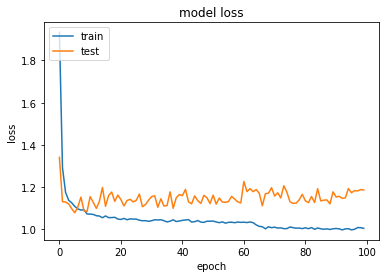

In [135]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model_loss.png')
plt.show()